# Imports

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Data Visualization

In [16]:
#df = pd.read_csv('data.csv')
df_original = pd.read_csv('data.csv', sep=' ', header=None)
df = df_original.copy()

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


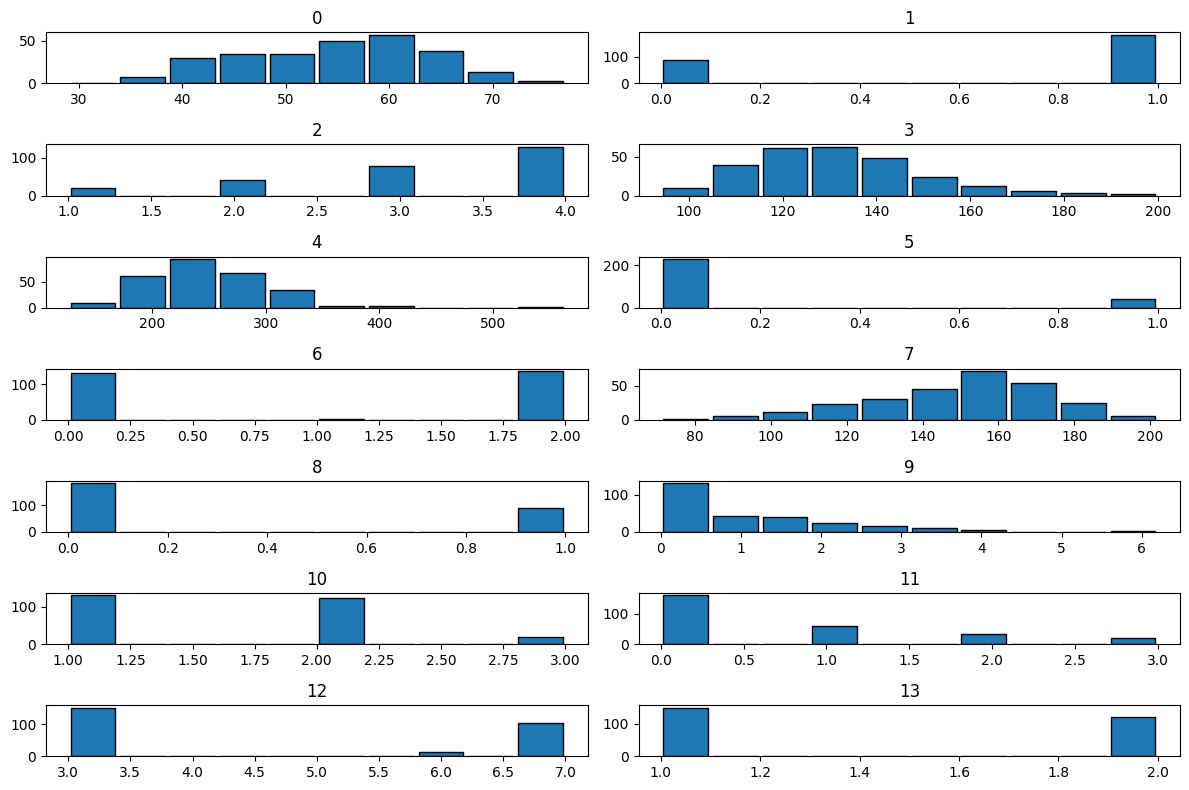

In [17]:
num_colunas = 2
num_linhas = (len(df.columns) + 1) // num_colunas

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(12, 8))

for i, coluna in enumerate(df.columns):
    linha = i // num_colunas
    col = i % num_colunas
    axs[linha, col].hist(df[coluna], rwidth=0.9, edgecolor='black')
    axs[linha, col].set_title(coluna)

plt.tight_layout()
plt.savefig('Dispersão.png')

plt.show()

In [18]:
df.isnull().sum() #verificando numero de nulos

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [19]:
y = df.columns[-1]  #pegando a ultima coluna
values = df[y].value_counts()
values #visualizando se minhas classes estão separadas igualmente

13
1    150
2    120
Name: count, dtype: int64

Classes desbalanceadas: Acuracia não é confiavel.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       270 non-null    float64
 1   1       270 non-null    float64
 2   2       270 non-null    float64
 3   3       270 non-null    float64
 4   4       270 non-null    float64
 5   5       270 non-null    float64
 6   6       270 non-null    float64
 7   7       270 non-null    float64
 8   8       270 non-null    float64
 9   9       270 non-null    float64
 10  10      270 non-null    float64
 11  11      270 non-null    float64
 12  12      270 non-null    float64
 13  13      270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB


# Pre-training

In [21]:
y = df.iloc[:, -1] 
X = df.iloc[:, :-1]

In [22]:
scaler = StandardScaler()
X_features  = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_features)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42, stratify=y)

# Classifiers

In [24]:

#MLP
mlp = MLPClassifier(activation='relu', alpha=1e-05, hidden_layer_sizes = (10,), solver='adam', random_state=42, max_iter=1000, shuffle=True).fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)

#naive bayes
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
gnb_predicted = gnb.predict(X_test)

#SVM
svm_linear = svm.SVC(C=1.0, kernel='linear')
svm_linear = svm_linear.fit(X_train,y_train)
svm_predict_linear = svm_linear.predict(X_test)

svm_poly = svm.SVC(C=1.0, kernel='poly')
svm_poly = svm_poly.fit(X_train,y_train)
svm_predict_poly = svm_poly.predict(X_test)

svm_rbf = svm.SVC(C=1.0, kernel='rbf')
svm_rbf = svm_rbf.fit(X_train,y_train)
svm_predict_rbf = svm_rbf.predict(X_test)


/home/iza/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# Metrics

In [25]:
metricas_mlp_PCA = {
    'Acc MLP': accuracy_score(y_test, mlp_predict),
    'Precisao MLP': precision_score(y_test, mlp_predict),
    'Recall MLP': recall_score(y_test, mlp_predict),
    'F1 MLP': f1_score(y_test, mlp_predict)
}

metricas_nb_PCA  = {
    'Acc Naive Bayes': accuracy_score(y_test, gnb_predicted),
    'Precisao Naive Bayes': precision_score(y_test, gnb_predicted),
    'Recall Naive Bayes': recall_score(y_test, gnb_predicted),
    'F1 Naive Bayes': f1_score(y_test, gnb_predicted)
}

metricas_linear_PCA  = {
    'Acc SVM Linear': accuracy_score(y_test, svm_predict_linear),
    'Precisao SVM Linear': precision_score(y_test, svm_predict_linear),
    'Recall SVM Linear': recall_score(y_test, svm_predict_linear),
    'F1 SVM Linear': f1_score(y_test, svm_predict_linear)
}

metricas_poly_PCA  = {
    'Acc SVM polinomial': accuracy_score(y_test, svm_predict_poly),
    'Precisao SVM polinomial': precision_score(y_test, svm_predict_poly),
    'Recall SVM polinomial': recall_score(y_test, svm_predict_poly),
    'F1 SVM polinomial': f1_score(y_test, svm_predict_poly)
}

metricas_rbf_PCA  = {
    'Acc SVM rbf': accuracy_score(y_test, svm_predict_rbf),
    'Precisao SVM rbf': precision_score(y_test, svm_predict_rbf),
    'Recall SVM rbf': recall_score(y_test, svm_predict_rbf),
    'F1 SVM rbf': f1_score(y_test, svm_predict_rbf)
}

In [26]:
with open('metricas_mlp_hea.pkl', 'wb') as arquivo:
    pickle.dump(metricas_mlp_PCA , arquivo)

with open('metricas_nb_hea.pkl', 'wb') as arquivo:
    pickle.dump(metricas_nb_PCA , arquivo)

with open('metricas_SVMlinear_hea.pkl', 'wb') as arquivo:
    pickle.dump(metricas_linear_PCA , arquivo)

with open('metricas_SVMpoly_hea.pkl', 'wb') as arquivo:
    pickle.dump(metricas_poly_PCA , arquivo)

with open('metricas_SVMrbf_hea.pkl', 'wb') as arquivo:
    pickle.dump(metricas_rbf_PCA , arquivo)